https://docs.google.com/spreadsheets/d/1EDuNa8KVJQ-4xCXS4t3CKo-7u-ev5yHXGdorF8K9i7g/edit#gid=0

## 526

In [16]:
import chronos as cr

toiid = 526
t = cr.Target(toiid=toiid)
#query gaia source id for use later
d = t.query_gaia_dr2_catalog(return_nearest_xmatch=True)

Querying Gaia DR2 catalog for 85.3357 11.1944 within 3.0 arcsec.



### short cadence

Searching lightcurvefile using lightkurve


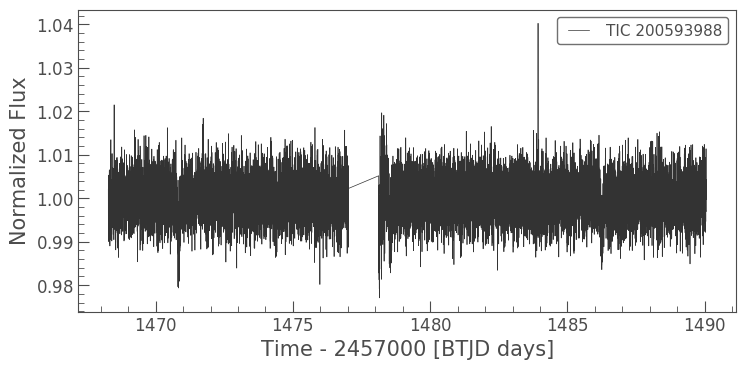

In [23]:
l = cr.ShortCadence(toiid=toiid)
lc = l.get_lc(lctype='pdcsap')
lc.plot()

  0%|          | 0/1902 periods | 00:00<?

Transit Least Squares TLS 1.0.23 (12 March 2019)
Creating model cache for 27 durations
Searching 14827 data points, 1902 periods from 0.601 to 10.886 days
Using all 8 CPU threads


100%|██████████| 1902/1902 periods | 00:10<00:00
  7%|▋         | 351/5148 [00:00<00:01, 3507.71it/s]

Searching for best T0 for period 7.70082 days


100%|██████████| 5148/5148 [00:01<00:00, 4480.19it/s]


(0.4, 0.6)

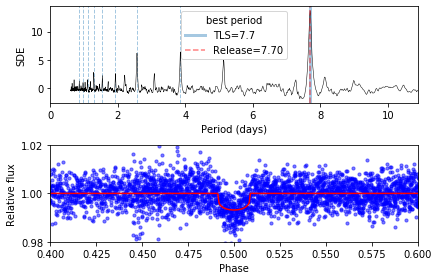

In [26]:
import transitleastsquares as tls

#run tls
time, flux = lc.time, lc.flux
tls_results = tls.transitleastsquares(time, flux).power()

fig = cr.plot_tls(tls_results);
#add period from toi release for reference 
tess_period = t.toi_params['Period (days)'].values[0]
fig.axes[0].axvline(tess_period, 0, 1, c='r', ls='--', alpha=0.5, label=f'Release={tess_period:.2f}')
fig.axes[0].legend(title='best period')
fig.axes[1].set_ylim(0.98,1.02)
fig.axes[1].set_xlim(0.4,0.6)


  0%|          | 0/1902 periods | 00:00<?

Transit Least Squares TLS 1.0.23 (12 March 2019)
Creating model cache for 27 durations
Searching 14256 data points, 1902 periods from 0.601 to 10.886 days
Using all 8 CPU threads


100%|██████████| 1902/1902 periods | 00:10<00:00
  3%|▎         | 239/9138 [00:00<00:03, 2384.79it/s]

Searching for best T0 for period 4.57266 days


100%|██████████| 9138/9138 [00:02<00:00, 3968.28it/s]


(0.4, 0.6)

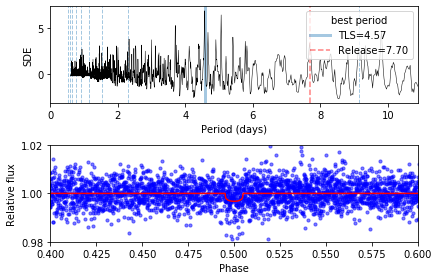

In [27]:
#mask transit
intransit = tls.transit_mask(lc.time, tls_results.period, 2*tls_results.duration, tls_results.T0)
time2 = lc.time[~intransit]
flux2 = lc.flux[~intransit]

#re-run tls
tls_results2 = tls.transitleastsquares(time2, flux2).power()

fig = cr.plot_tls(tls_results2);
#add period from toi release for reference 
tess_period = t.toi_params['Period (days)'].values[0]
fig.axes[0].axvline(tess_period, 0, 1, c='r', ls='--', alpha=0.5, label=f'Release={tess_period:.2f}')
fig.axes[0].legend(title='best period')
fig.axes[1].set_ylim(0.98,1.02)
fig.axes[1].set_xlim(0.4,0.6)

### custom

In [ ]:
lc = l.make_custom_lc(sap_mask='pipeline')
lc.plot()


Searching mast for TIC 200593988

1 tpf(s) found in sector(s) [6]
Using data from sector 6 only




### long cadence

Searching targetpixelfile using Tesscut
Applying data quality mask identified in Data Release Notes (sector 6):
t>1468.26998

aperture photometry mask: threshold



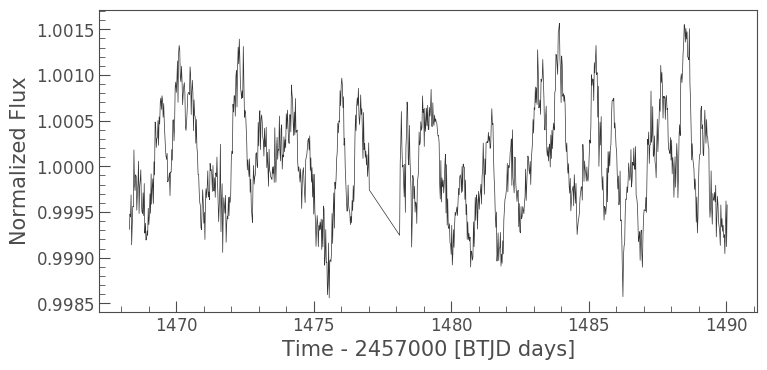

In [18]:
l = cr.LongCadence(toiid=toiid)
lc = l.make_custom_lc(sap_mask='threshold', threshold_sigma=3)
lc.plot()

  0%|          | 0/1900 periods | 00:00<?

Transit Least Squares TLS 1.0.23 (12 March 2019)
Creating model cache for 27 durations
Searching 987 data points, 1900 periods from 0.601 to 10.875 days
Using all 8 CPU threads


100%|██████████| 1900/1900 periods | 00:04<00:00


(0.4, 0.6)

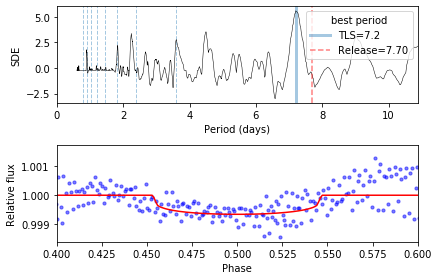

In [19]:
import transitleastsquares as tls

#run tls
time, flux = lc.time, lc.flux
tls_results = tls.transitleastsquares(time, flux).power()

fig = cr.plot_tls(tls_results);
#add period from toi release for reference 
tess_period = t.toi_params['Period (days)'].values[0]
fig.axes[0].axvline(tess_period, 0, 1, c='r', ls='--', alpha=0.5, label=f'Release={tess_period:.2f}')
fig.axes[0].legend(title='best period')
# fig.axes[1].set_ylim(0.998,1.002)
fig.axes[1].set_xlim(0.4,0.6)


  0%|          | 0/1742 periods | 00:00<?

Transit Least Squares TLS 1.0.23 (12 March 2019)
Creating model cache for 26 durations
Searching 787 data points, 1742 periods from 0.602 to 10.125 days
Using all 8 CPU threads


100%|██████████| 1742/1742 periods | 00:03<00:00


(0.4, 0.6)

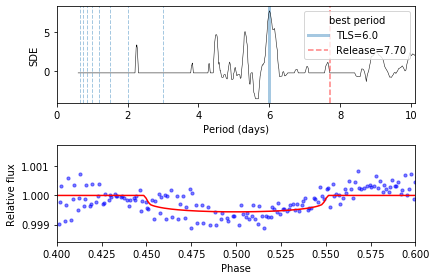

In [20]:
#mask transit
intransit = tls.transit_mask(lc.time, tls_results.period, 2*tls_results.duration, tls_results.T0)
time2 = lc.time[~intransit]
flux2 = lc.flux[~intransit]

#re-run tls
tls_results2 = tls.transitleastsquares(time2, flux2).power()

fig = cr.plot_tls(tls_results2);
#add period from toi release for reference 
tess_period = t.toi_params['Period (days)'].values[0]
fig.axes[0].axvline(tess_period, 0, 1, c='r', ls='--', alpha=0.5, label=f'Release={tess_period:.2f}')
fig.axes[0].legend(title='best period')
# fig.axes[1].set_ylim(0.998,1.002)
fig.axes[1].set_xlim(0.4,0.6)

# 892

In [49]:
import chronos as cr

toiid = 892
t = cr.Target(toiid=toiid)
#query gaia source id for use later
d = t.query_gaia_dr2_catalog(return_nearest_xmatch=True)

Querying Gaia DR2 catalog for 86.7382 -11.2353 within 3.0 arcsec.



### long cadence

Searching targetpixelfile using Tesscut
Applying data quality mask identified in Data Release Notes (sector 6):
t>1468.26998

aperture photometry mask: threshold



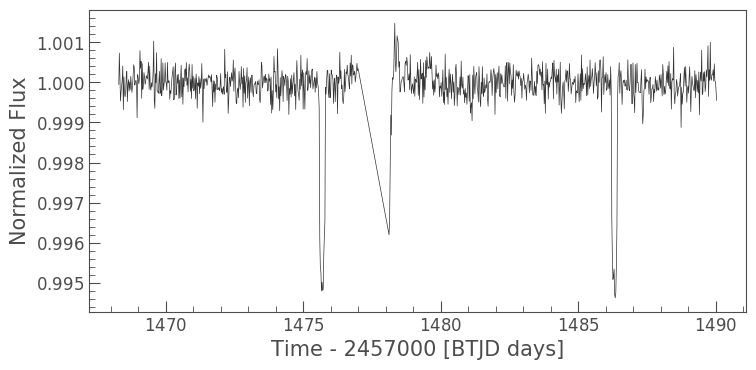

In [51]:
l = cr.LongCadence(toiid=toiid)
lc = l.make_custom_lc(sap_mask='threshold', threshold_sigma=3)
lc.plot()

  0%|          | 0/1900 periods | 00:00<?

Transit Least Squares TLS 1.0.23 (12 March 2019)
Creating model cache for 27 durations
Searching 986 data points, 1900 periods from 0.601 to 10.875 days
Using all 8 CPU threads


100%|██████████| 1900/1900 periods | 00:03<00:00


(0.4, 0.6)

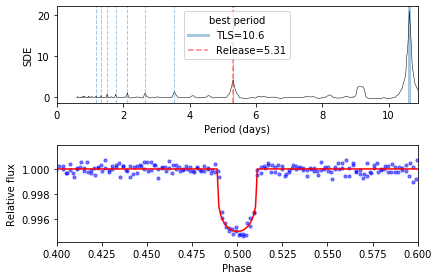

In [52]:
import transitleastsquares as tls

#run tls
time, flux = lc.time, lc.flux
tls_results = tls.transitleastsquares(time, flux).power()

fig = cr.plot_tls(tls_results);
#add period from toi release for reference 
tess_period = t.toi_params['Period (days)'].values[0]
fig.axes[0].axvline(tess_period, 0, 1, c='r', ls='--', alpha=0.5, label=f'Release={tess_period:.2f}')
fig.axes[0].legend(title='best period')
# fig.axes[1].set_ylim(0.998,1.002)
fig.axes[1].set_xlim(0.4,0.6)


  0%|          | 0/1900 periods | 00:00<?

Transit Least Squares TLS 1.0.23 (12 March 2019)
Creating model cache for 27 durations
Searching 940 data points, 1900 periods from 0.601 to 10.875 days
Using all 8 CPU threads


100%|██████████| 1900/1900 periods | 00:04<00:00


(0.4, 0.6)

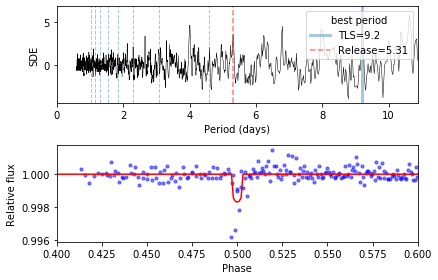

In [34]:
#mask transit
intransit = tls.transit_mask(lc.time, tls_results.period, 2*tls_results.duration, tls_results.T0)
time2 = lc.time[~intransit]
flux2 = lc.flux[~intransit]

#re-run tls
tls_results2 = tls.transitleastsquares(time2, flux2).power()

fig = cr.plot_tls(tls_results2);
#add period from toi release for reference 
tess_period = t.toi_params['Period (days)'].values[0]
fig.axes[0].axvline(tess_period, 0, 1, c='r', ls='--', alpha=0.5, label=f'Release={tess_period:.2f}')
fig.axes[0].legend(title='best period')
# fig.axes[1].set_ylim(0.998,1.002)
fig.axes[1].set_xlim(0.4,0.6)

# 957

In [70]:
import chronos as cr

toiid = 957
t = cr.Target(toiid=toiid)
#query gaia source id for use later
d = t.query_gaia_dr2_catalog(return_nearest_xmatch=True)

### long cadence

Searching targetpixelfile using Tesscut
Applying data quality mask identified in Data Release Notes (sector 5):
t<1463.93945

aperture photometry mask: threshold



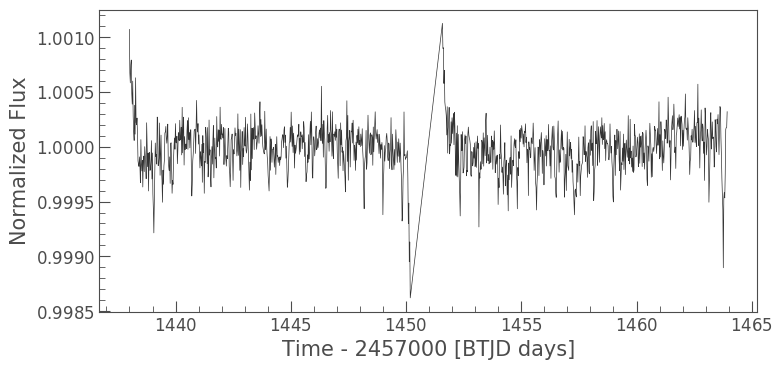

In [39]:
l = cr.LongCadence(toiid=toiid)
lc = l.make_custom_lc(sap_mask='threshold', threshold_sigma=3)
lc.plot()

  0%|          | 0/2344 periods | 00:00<?

Transit Least Squares TLS 1.0.23 (12 March 2019)
Creating model cache for 28 durations
Searching 1172 data points, 2344 periods from 0.602 to 12.969 days
Using all 8 CPU threads


100%|██████████| 2344/2344 periods | 00:05<00:00


(0.4, 0.6)

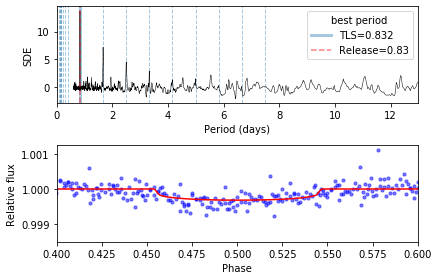

In [40]:
import transitleastsquares as tls

#run tls
time, flux = lc.time, lc.flux
tls_results = tls.transitleastsquares(time, flux).power()

fig = cr.plot_tls(tls_results);
#add period from toi release for reference 
tess_period = t.toi_params['Period (days)'].values[0]
fig.axes[0].axvline(tess_period, 0, 1, c='r', ls='--', alpha=0.5, label=f'Release={tess_period:.2f}')
fig.axes[0].legend(title='best period')
# fig.axes[1].set_ylim(0.998,1.002)
fig.axes[1].set_xlim(0.4,0.6)


  0%|          | 0/2340 periods | 00:00<?

Transit Least Squares TLS 1.0.23 (12 March 2019)
Creating model cache for 28 durations
Searching 962 data points, 2340 periods from 0.601 to 12.948 days
Using all 8 CPU threads


100%|██████████| 2340/2340 periods | 00:05<00:00


(0.4, 0.6)

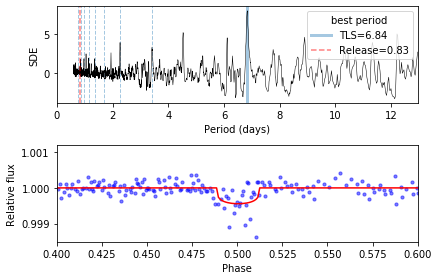

In [41]:
#mask transit
intransit = tls.transit_mask(lc.time, tls_results.period, 2*tls_results.duration, tls_results.T0)
time2 = lc.time[~intransit]
flux2 = lc.flux[~intransit]

#re-run tls
tls_results2 = tls.transitleastsquares(time2, flux2).power()

fig = cr.plot_tls(tls_results2);
#add period from toi release for reference 
tess_period = t.toi_params['Period (days)'].values[0]
fig.axes[0].axvline(tess_period, 0, 1, c='r', ls='--', alpha=0.5, label=f'Release={tess_period:.2f}')
fig.axes[0].legend(title='best period')
# fig.axes[1].set_ylim(0.998,1.002)
fig.axes[1].set_xlim(0.4,0.6)

# 958

In [6]:
import chronos as cr

toiid = 958
t = cr.Target(toiid=toiid)
#query gaia source id for use later
d = t.query_gaia_dr2_catalog(return_nearest_xmatch=True)

Querying Gaia DR2 catalog for 83.2158 -19.5751 within 3.0 arcsec.



### long cadence

Available sectors: [5, 6]
Using sector=5.
Searching targetpixelfile using Tesscut
Applying data quality mask identified in Data Release Notes (sector 5):
t<1463.93945

aperture photometry mask: threshold



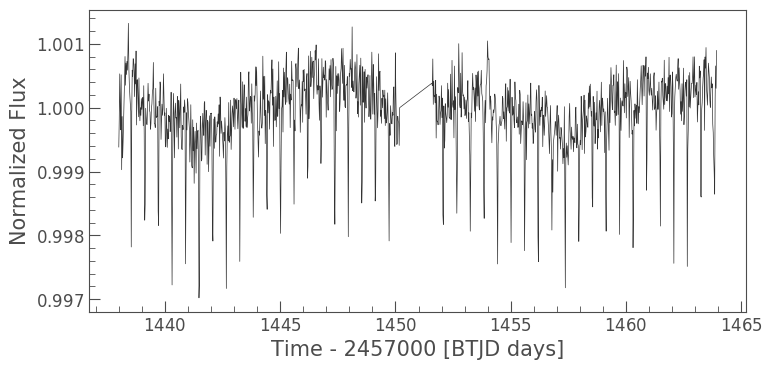

In [8]:
l = cr.LongCadence(toiid=toiid)
lc = l.make_custom_lc(sap_mask='threshold', threshold_sigma=3)
lc.plot()

  0%|          | 0/2344 periods | 00:00<?

Transit Least Squares TLS 1.0.23 (12 March 2019)
Creating model cache for 28 durations
Searching 1172 data points, 2344 periods from 0.602 to 12.969 days
Using all 8 CPU threads


100%|██████████| 2344/2344 periods | 00:04<00:00 


(0.4, 0.6)

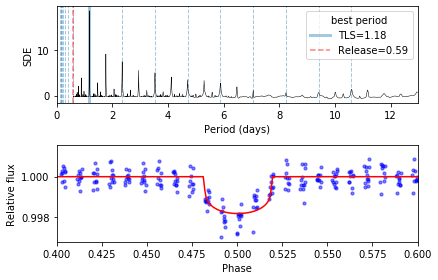

In [9]:
import transitleastsquares as tls

#run tls
time, flux = lc.time, lc.flux
tls_results = tls.transitleastsquares(time, flux).power()

fig = cr.plot_tls(tls_results);
#add period from toi release for reference 
tess_period = t.toi_params['Period (days)'].values[0]
fig.axes[0].axvline(tess_period, 0, 1, c='r', ls='--', alpha=0.5, label=f'Release={tess_period:.2f}')
fig.axes[0].legend(title='best period')
# fig.axes[1].set_ylim(0.998,1.002)
fig.axes[1].set_xlim(0.4,0.6)


  0%|          | 0/2342 periods | 00:00<?

Transit Least Squares TLS 1.0.23 (12 March 2019)
Creating model cache for 28 durations
Searching 1076 data points, 2342 periods from 0.601 to 12.958 days
Using all 8 CPU threads


100%|██████████| 2342/2342 periods | 00:04<00:00 


(0.4, 0.6)

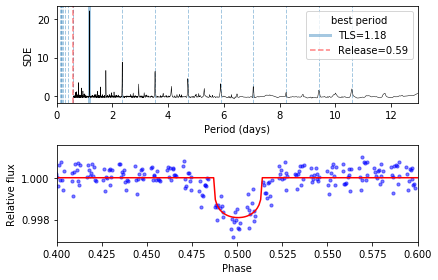

In [10]:
#mask transit
intransit = tls.transit_mask(lc.time, tls_results.period, 2*tls_results.duration, tls_results.T0)
time2 = lc.time[~intransit]
flux2 = lc.flux[~intransit]

#re-run tls
tls_results2 = tls.transitleastsquares(time2, flux2).power()

fig = cr.plot_tls(tls_results2);
#add period from toi release for reference 
tess_period = t.toi_params['Period (days)'].values[0]
fig.axes[0].axvline(tess_period, 0, 1, c='r', ls='--', alpha=0.5, label=f'Release={tess_period:.2f}')
fig.axes[0].legend(title='best period')
# fig.axes[1].set_ylim(0.998,1.002)
fig.axes[1].set_xlim(0.4,0.6)

  0%|          | 0/2342 periods | 00:00<?

Transit Least Squares TLS 1.0.23 (12 March 2019)
Creating model cache for 28 durations
Searching 1016 data points, 2342 periods from 0.601 to 12.958 days
Using all 8 CPU threads


100%|██████████| 2342/2342 periods | 00:04<00:00


(0.4, 0.6)

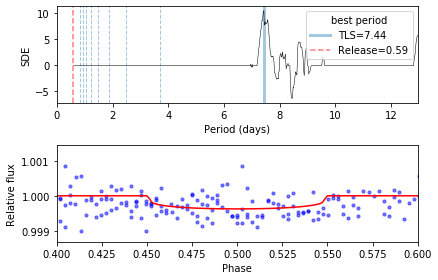

In [11]:
#mask transit
intransit = tls.transit_mask(time2, tls_results2.period, 2*tls_results2.duration, tls_results2.T0)
time3 = time2[~intransit]
flux3 = flux2[~intransit]

#re-run tls
tls_results3 = tls.transitleastsquares(time3, flux3).power()

fig = cr.plot_tls(tls_results3);
#add period from toi release for reference 
tess_period = t.toi_params['Period (days)'].values[0]
fig.axes[0].axvline(tess_period, 0, 1, c='r', ls='--', alpha=0.5, label=f'Release={tess_period:.2f}')
fig.axes[0].legend(title='best period')
# fig.axes[1].set_ylim(0.98,1.02)
fig.axes[1].set_xlim(0.4,0.6)

# 1138

In [42]:
import chronos as cr

toiid = 1138
t = cr.Target(toiid=toiid)
#query gaia source id for use later
d = t.query_gaia_dr2_catalog(return_nearest_xmatch=True)

Querying Gaia DR2 catalog for 291.463 25.1894 within 3.0 arcsec.



### short cadence

Searching lightcurvefile using lightkurve


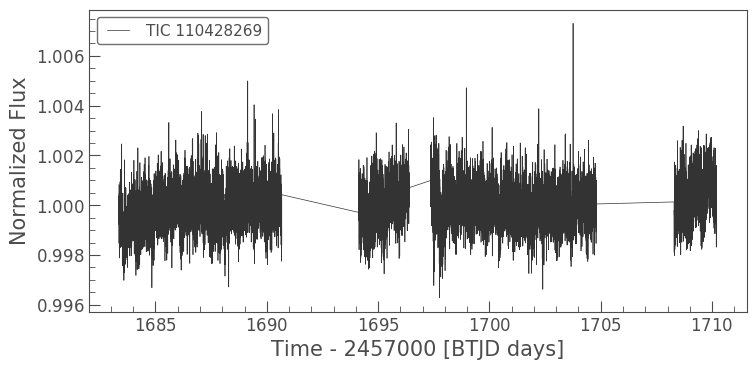

In [44]:
l = cr.ShortCadence(toiid=toiid)
lc = l.get_lc(lctype='pdcsap')
lc.plot()

  0%|          | 0/2442 periods | 00:00<?

Transit Least Squares TLS 1.0.23 (12 March 2019)
Creating model cache for 28 durations
Searching 13568 data points, 2442 periods from 0.602 to 13.425 days
Using all 8 CPU threads


100%|██████████| 2442/2442 periods | 00:14<00:00


(0.4, 0.6)

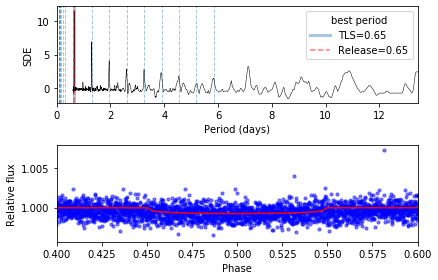

In [47]:
import transitleastsquares as tls

#run tls
time, flux = lc.time, lc.flux
tls_results = tls.transitleastsquares(time, flux).power()

fig = cr.plot_tls(tls_results);
#add period from toi release for reference 
tess_period = t.toi_params['Period (days)'].values[0]
fig.axes[0].axvline(tess_period, 0, 1, c='r', ls='--', alpha=0.5, label=f'Release={tess_period:.2f}')
fig.axes[0].legend(title='best period')
# fig.axes[1].set_ylim(0.98,1.02)
fig.axes[1].set_xlim(0.4,0.6)


  0%|          | 0/2436 periods | 00:00<?

Transit Least Squares TLS 1.0.23 (12 March 2019)
Creating model cache for 28 durations
Searching 11424 data points, 2436 periods from 0.601 to 13.395 days
Using all 8 CPU threads


100%|██████████| 2436/2436 periods | 00:11<00:00


(0.4, 0.6)

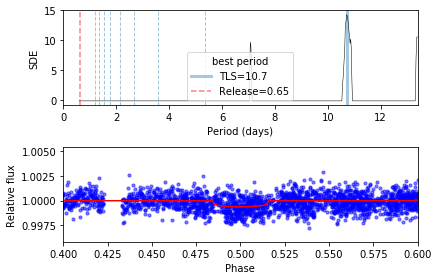

In [48]:
#mask transit
intransit = tls.transit_mask(lc.time, tls_results.period, 2*tls_results.duration, tls_results.T0)
time2 = lc.time[~intransit]
flux2 = lc.flux[~intransit]

#re-run tls
tls_results2 = tls.transitleastsquares(time2, flux2).power()

fig = cr.plot_tls(tls_results2);
#add period from toi release for reference 
tess_period = t.toi_params['Period (days)'].values[0]
fig.axes[0].axvline(tess_period, 0, 1, c='r', ls='--', alpha=0.5, label=f'Release={tess_period:.2f}')
fig.axes[0].legend(title='best period')
# fig.axes[1].set_ylim(0.98,1.02)
fig.axes[1].set_xlim(0.4,0.6)

### custom

In [ ]:
lc = l.make_custom_lc(sap_mask='pipeline')
lc.plot()


Searching mast for TIC 200593988

1 tpf(s) found in sector(s) [6]
Using data from sector 6 only




### long cadence

In [17]:
l = cr.LongCadence(toiid=toiid)

Available sectors: [6]
Using sector=6.


Searching targetpixelfile using Tesscut
Applying data quality mask identified in Data Release Notes (sector 6):
t>1468.26998

aperture photometry mask: threshold



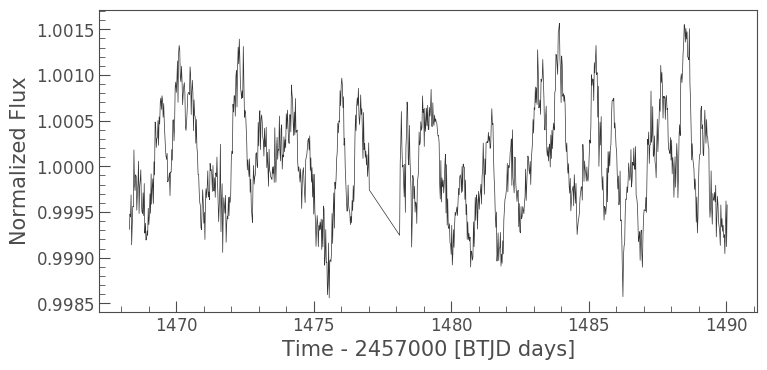

In [18]:
lc = l.make_custom_lc(sap_mask='threshold', threshold_sigma=3)
lc.plot()

  0%|          | 0/1900 periods | 00:00<?

Transit Least Squares TLS 1.0.23 (12 March 2019)
Creating model cache for 27 durations
Searching 987 data points, 1900 periods from 0.601 to 10.875 days
Using all 8 CPU threads


100%|██████████| 1900/1900 periods | 00:04<00:00


(0.4, 0.6)

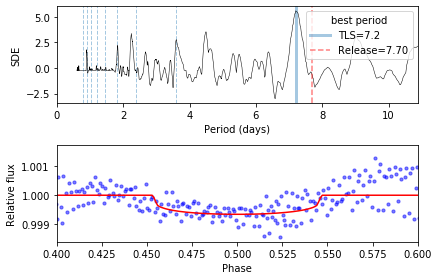

In [19]:
import transitleastsquares as tls

#run tls
time, flux = lc.time, lc.flux
tls_results = tls.transitleastsquares(time, flux).power()

fig = cr.plot_tls(tls_results);
#add period from toi release for reference 
tess_period = t.toi_params['Period (days)'].values[0]
fig.axes[0].axvline(tess_period, 0, 1, c='r', ls='--', alpha=0.5, label=f'Release={tess_period:.2f}')
fig.axes[0].legend(title='best period')
# fig.axes[1].set_ylim(0.998,1.002)
fig.axes[1].set_xlim(0.4,0.6)


  0%|          | 0/1742 periods | 00:00<?

Transit Least Squares TLS 1.0.23 (12 March 2019)
Creating model cache for 26 durations
Searching 787 data points, 1742 periods from 0.602 to 10.125 days
Using all 8 CPU threads


100%|██████████| 1742/1742 periods | 00:03<00:00


(0.4, 0.6)

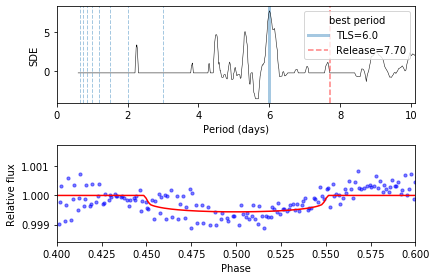

In [20]:
#mask transit
intransit = tls.transit_mask(lc.time, tls_results.period, 2*tls_results.duration, tls_results.T0)
time2 = lc.time[~intransit]
flux2 = lc.flux[~intransit]

#re-run tls
tls_results2 = tls.transitleastsquares(time2, flux2).power()

fig = cr.plot_tls(tls_results2);
#add period from toi release for reference 
tess_period = t.toi_params['Period (days)'].values[0]
fig.axes[0].axvline(tess_period, 0, 1, c='r', ls='--', alpha=0.5, label=f'Release={tess_period:.2f}')
fig.axes[0].legend(title='best period')
# fig.axes[1].set_ylim(0.998,1.002)
fig.axes[1].set_xlim(0.4,0.6)

# 1175

In [71]:
import chronos as cr

toiid = 1175
t = cr.Target(toiid=toiid)
#query gaia source id for use later
d = t.query_gaia_dr2_catalog(return_nearest_xmatch=True)

Querying Gaia DR2 catalog for 289.239 31.3236 within 3.0 arcsec.



### long cadence

Searching targetpixelfile using Tesscut
Applying data quality mask identified in Data Release Notes (sector 14):
aperture photometry mask: threshold



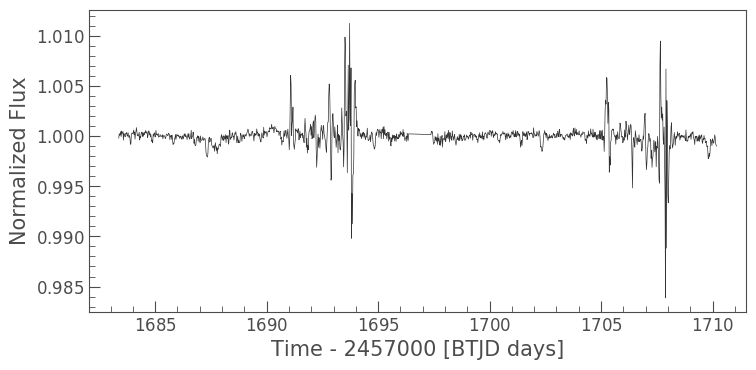

In [76]:
l = cr.LongCadence(toiid=toiid)
lc = l.make_custom_lc(sap_mask='threshold', threshold_sigma=3)
lc.plot()

  0%|          | 0/2438 periods | 00:00<?

Transit Least Squares TLS 1.0.23 (12 March 2019)
Creating model cache for 28 durations
Searching 1237 data points, 2438 periods from 0.602 to 13.406 days
Using all 8 CPU threads


100%|██████████| 2438/2438 periods | 00:05<00:00


(0.4, 0.6)

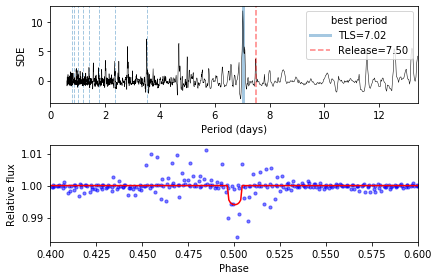

In [77]:
import transitleastsquares as tls

#run tls
time, flux = lc.time, lc.flux
tls_results = tls.transitleastsquares(time, flux).power()

fig = cr.plot_tls(tls_results);
#add period from toi release for reference 
tess_period = t.toi_params['Period (days)'].values[0]
fig.axes[0].axvline(tess_period, 0, 1, c='r', ls='--', alpha=0.5, label=f'Release={tess_period:.2f}')
fig.axes[0].legend(title='best period')
# fig.axes[1].set_ylim(0.998,1.002)
fig.axes[1].set_xlim(0.4,0.6)


  0%|          | 0/2438 periods | 00:00<?

Transit Least Squares TLS 1.0.23 (12 March 2019)
Creating model cache for 28 durations
Searching 1214 data points, 2438 periods from 0.602 to 13.406 days
Using all 8 CPU threads


100%|██████████| 2438/2438 periods | 00:05<00:00


(0.4, 0.6)

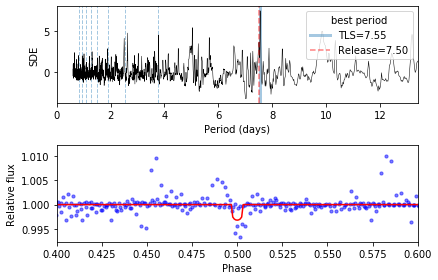

In [78]:
#mask transit
intransit = tls.transit_mask(lc.time, tls_results.period, 2*tls_results.duration, tls_results.T0)
time2 = lc.time[~intransit]
flux2 = lc.flux[~intransit]

#re-run tls
tls_results2 = tls.transitleastsquares(time2, flux2).power()

fig = cr.plot_tls(tls_results2);
#add period from toi release for reference 
tess_period = t.toi_params['Period (days)'].values[0]
fig.axes[0].axvline(tess_period, 0, 1, c='r', ls='--', alpha=0.5, label=f'Release={tess_period:.2f}')
fig.axes[0].legend(title='best period')
# fig.axes[1].set_ylim(0.998,1.002)
fig.axes[1].set_xlim(0.4,0.6)

# 1181

In [79]:
import chronos as cr

toiid = 1181
t = cr.Target(toiid=toiid)
#query gaia source id for use later
d = t.query_gaia_dr2_catalog(return_nearest_xmatch=True)

Querying Gaia DR2 catalog for 297.216 64.3543 within 3.0 arcsec.



### long cadence

In [82]:
l = cr.LongCadence(toiid=toiid)

Available sectors: [14, 15, 16, 17, 18, 19]
Using sector=14.


Searching targetpixelfile using Tesscut
Applying data quality mask identified in Data Release Notes (sector 14):
aperture photometry mask: threshold



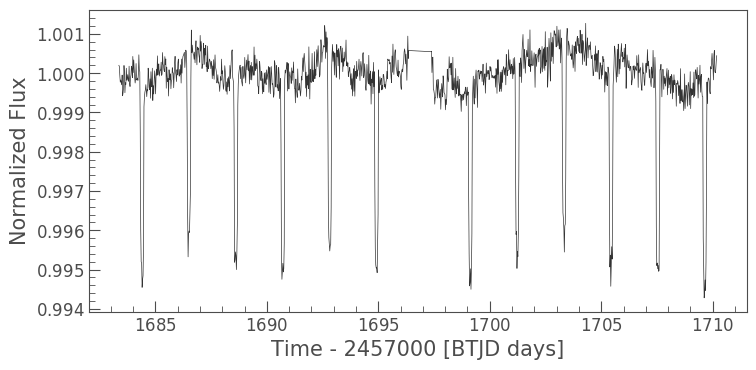

In [83]:
lc = l.make_custom_lc(sap_mask='threshold', threshold_sigma=3)
lc.plot()

  0%|          | 0/2438 periods | 00:00<?

Transit Least Squares TLS 1.0.23 (12 March 2019)
Creating model cache for 28 durations
Searching 1237 data points, 2438 periods from 0.602 to 13.406 days
Using all 8 CPU threads


100%|██████████| 2438/2438 periods | 00:04<00:00


(0.4, 0.6)

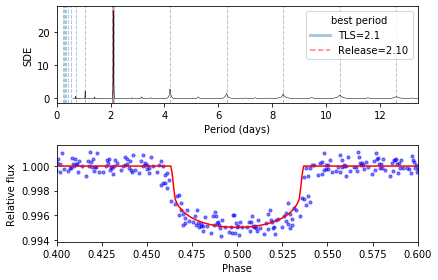

In [84]:
import transitleastsquares as tls

#run tls
time, flux = lc.time, lc.flux
tls_results = tls.transitleastsquares(time, flux).power()

fig = cr.plot_tls(tls_results);
#add period from toi release for reference 
tess_period = t.toi_params['Period (days)'].values[0]
fig.axes[0].axvline(tess_period, 0, 1, c='r', ls='--', alpha=0.5, label=f'Release={tess_period:.2f}')
fig.axes[0].legend(title='best period')
# fig.axes[1].set_ylim(0.998,1.002)
fig.axes[1].set_xlim(0.4,0.6)


  0%|          | 0/2438 periods | 00:00<?

Transit Least Squares TLS 1.0.23 (12 March 2019)
Creating model cache for 28 durations
Searching 1058 data points, 2438 periods from 0.602 to 13.406 days
Using all 8 CPU threads


100%|██████████| 2438/2438 periods | 00:03<00:00


(0.4, 0.6)

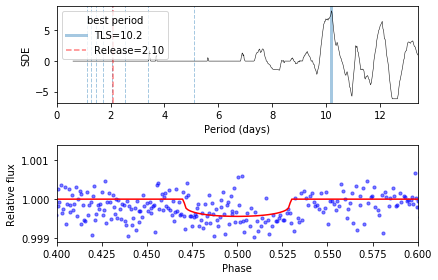

In [85]:
#mask transit
intransit = tls.transit_mask(lc.time, tls_results.period, 2*tls_results.duration, tls_results.T0)
time2 = lc.time[~intransit]
flux2 = lc.flux[~intransit]

#re-run tls
tls_results2 = tls.transitleastsquares(time2, flux2).power()

fig = cr.plot_tls(tls_results2);
#add period from toi release for reference 
tess_period = t.toi_params['Period (days)'].values[0]
fig.axes[0].axvline(tess_period, 0, 1, c='r', ls='--', alpha=0.5, label=f'Release={tess_period:.2f}')
fig.axes[0].legend(title='best period')
# fig.axes[1].set_ylim(0.998,1.002)
fig.axes[1].set_xlim(0.4,0.6)

# 1316

In [44]:
import chronos as cr

toiid = 1316
t = cr.Target(toiid=toiid)
#query gaia source id for use later
d = t.query_gaia_dr2_catalog(return_nearest_xmatch=True)

Querying Gaia DR2 catalog for 307.017 39.8771 within 3.0 arcsec.



### long cadence

In [46]:
l = cr.LongCadence(toiid=toiid)

Available sectors: [14, 15]
Using sector=14.


Searching targetpixelfile using Tesscut
Applying data quality mask identified in Data Release Notes (sector 14):
aperture photometry mask: threshold



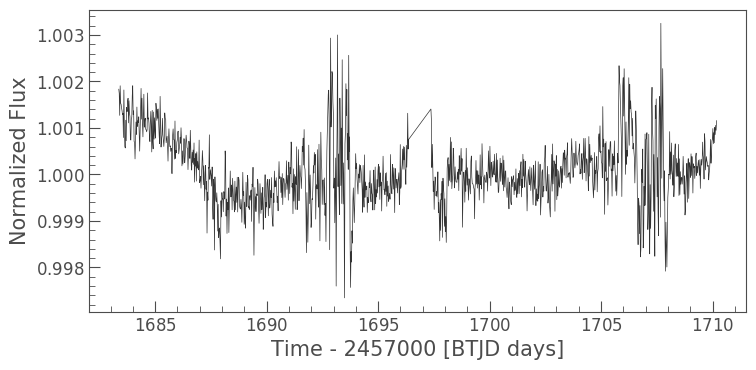

In [47]:
lc = l.make_custom_lc(sap_mask='threshold', threshold_sigma=3)
lc.plot()

  0%|          | 0/2438 periods | 00:00<?

Transit Least Squares TLS 1.0.23 (12 March 2019)
Creating model cache for 28 durations
Searching 1237 data points, 2438 periods from 0.602 to 13.406 days
Using all 8 CPU threads


100%|██████████| 2438/2438 periods | 00:04<00:00


(0.4, 0.6)

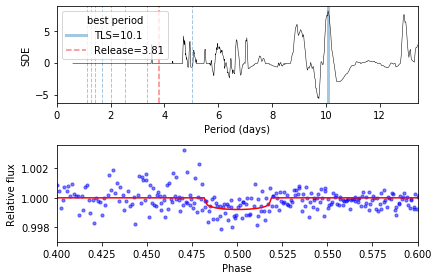

In [48]:
import transitleastsquares as tls

#run tls
time, flux = lc.time, lc.flux
tls_results = tls.transitleastsquares(time, flux).power()

fig = cr.plot_tls(tls_results);
#add period from toi release for reference 
tess_period = t.toi_params['Period (days)'].values[0]
fig.axes[0].axvline(tess_period, 0, 1, c='r', ls='--', alpha=0.5, label=f'Release={tess_period:.2f}')
fig.axes[0].legend(title='best period')
# fig.axes[1].set_ylim(0.998,1.002)
fig.axes[1].set_xlim(0.4,0.6)


  0%|          | 0/2438 periods | 00:00<?

Transit Least Squares TLS 1.0.23 (12 March 2019)
Creating model cache for 28 durations
Searching 1130 data points, 2438 periods from 0.602 to 13.406 days
Using all 8 CPU threads


100%|██████████| 2438/2438 periods | 00:04<00:00


(0.4, 0.6)

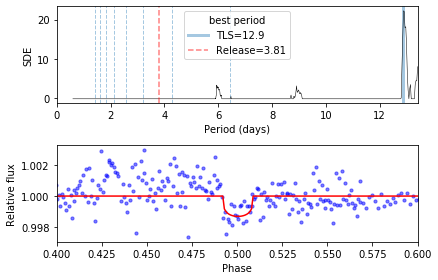

In [49]:
#mask transit
intransit = tls.transit_mask(lc.time, tls_results.period, 2*tls_results.duration, tls_results.T0)
time2 = lc.time[~intransit]
flux2 = lc.flux[~intransit]

#re-run tls
tls_results2 = tls.transitleastsquares(time2, flux2).power()

fig = cr.plot_tls(tls_results2);
#add period from toi release for reference 
tess_period = t.toi_params['Period (days)'].values[0]
fig.axes[0].axvline(tess_period, 0, 1, c='r', ls='--', alpha=0.5, label=f'Release={tess_period:.2f}')
fig.axes[0].legend(title='best period')
# fig.axes[1].set_ylim(0.998,1.002)
fig.axes[1].set_xlim(0.4,0.6)

# 1328

In [1]:
import chronos as cr

toiid = 1328
t = cr.Target(toiid=toiid)
#query gaia source id for use later
d = t.query_gaia_dr2_catalog(return_nearest_xmatch=True)

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Querying Gaia DR2 catalog for 315.11 46.0604 within 3.0 arcsec.



### long cadence

In [2]:
l = cr.LongCadence(toiid=toiid)

Available sectors: [15, 16]
Using sector=15.


Searching targetpixelfile using Tesscut
Applying data quality mask identified in Data Release Notes (sector 15):
aperture photometry mask: threshold



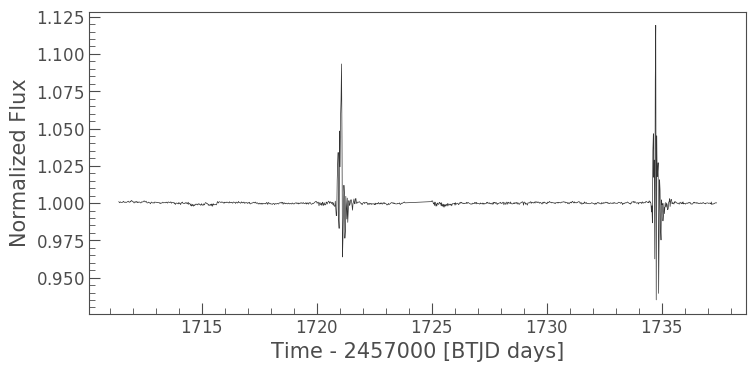

In [3]:
lc = l.make_custom_lc(sap_mask='threshold', threshold_sigma=3)
lc.plot()

  0%|          | 0/2351 periods | 00:00<?

Transit Least Squares TLS 1.0.23 (12 March 2019)
Creating model cache for 28 durations
Searching 1190 data points, 2351 periods from 0.601 to 13.0 days
Using all 8 CPU threads


100%|██████████| 2351/2351 periods | 00:08<00:00


(0.4, 0.6)

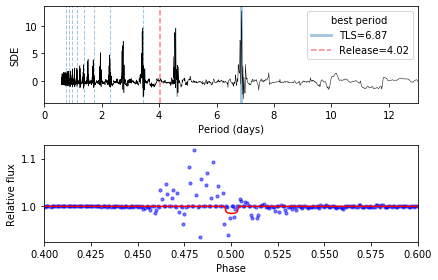

In [4]:
import transitleastsquares as tls

#run tls
time, flux = lc.time, lc.flux
tls_results = tls.transitleastsquares(time, flux).power()

fig = cr.plot_tls(tls_results);
#add period from toi release for reference 
tess_period = t.toi_params['Period (days)'].values[0]
fig.axes[0].axvline(tess_period, 0, 1, c='r', ls='--', alpha=0.5, label=f'Release={tess_period:.2f}')
fig.axes[0].legend(title='best period')
# fig.axes[1].set_ylim(0.998,1.002)
fig.axes[1].set_xlim(0.4,0.6)


  0%|          | 0/2351 periods | 00:00<?

Transit Least Squares TLS 1.0.23 (12 March 2019)
Creating model cache for 28 durations
Searching 1166 data points, 2351 periods from 0.601 to 13.0 days
Using all 8 CPU threads


100%|██████████| 2351/2351 periods | 00:08<00:00


(0.4, 0.6)

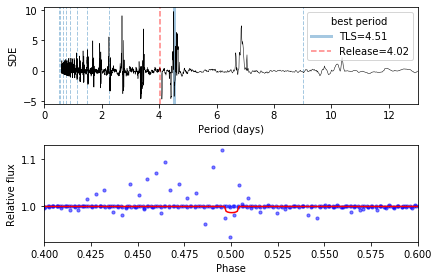

In [5]:
#mask transit
intransit = tls.transit_mask(lc.time, tls_results.period, 2*tls_results.duration, tls_results.T0)
time2 = lc.time[~intransit]
flux2 = lc.flux[~intransit]

#re-run tls
tls_results2 = tls.transitleastsquares(time2, flux2).power()

fig = cr.plot_tls(tls_results2);
#add period from toi release for reference 
tess_period = t.toi_params['Period (days)'].values[0]
fig.axes[0].axvline(tess_period, 0, 1, c='r', ls='--', alpha=0.5, label=f'Release={tess_period:.2f}')
fig.axes[0].legend(title='best period')
# fig.axes[1].set_ylim(0.998,1.002)
fig.axes[1].set_xlim(0.4,0.6)

# 1136

In [4]:
import chronos as cr

toiid = 1136
t = cr.Target(toiid=toiid)
#query gaia source id for use later
d = t.query_gaia_dr2_catalog(return_nearest_xmatch=True)

Querying Gaia DR2 catalog for 192.185 64.8553 within 3.0 arcsec.



In [41]:
tois=cr.get_tois(clobber=False)
tois[tois['TIC ID'].isin([t.ticid])]['Period (days)']

832    12.518414
833     6.256742
834    26.321863
Name: Period (days), dtype: float64

### short cadence

In [ ]:
l = cr.ShortCadence(toiid=toiid, sector='all')
lc = l.get_lc(lctype='pdcsap')
lc.plot()

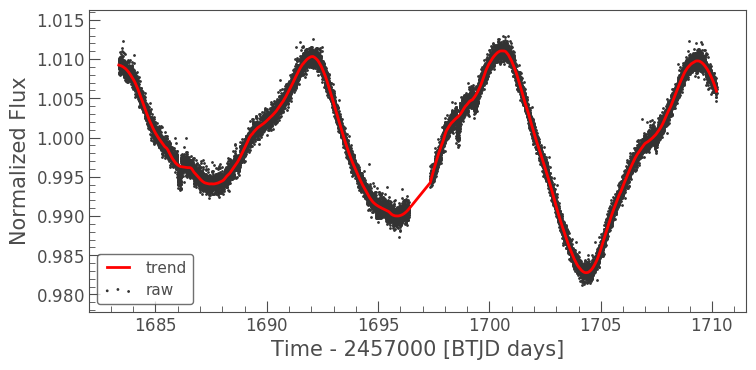

In [20]:
ax = lc.scatter(label='raw')
flat, trend = lc.flatten(window_length=801, break_tolerance=501, return_trend=True)
trend.plot(ax=ax, label='trend', c='r', lw=2)

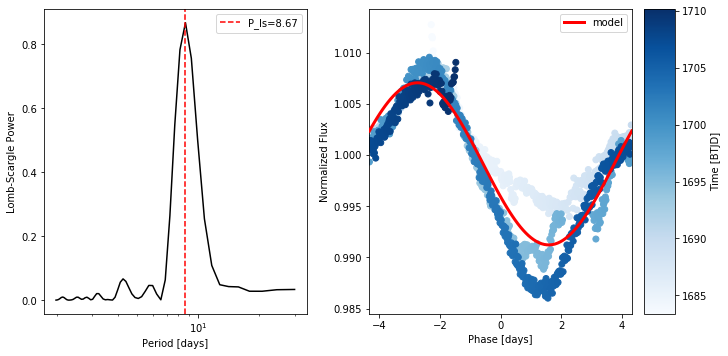

In [13]:
fig = cr.plot_lomb_scargle(lc.time, lc.flux, min_per=2, max_per=30, figsize=(10,5));

  0%|          | 0/2442 periods | 00:00<?

Transit Least Squares TLS 1.0.23 (12 March 2019)
Creating model cache for 28 durations
Searching 18522 data points, 2442 periods from 0.602 to 13.425 days
Using all 8 CPU threads


100%|██████████| 2442/2442 periods | 00:14<00:00
  4%|▍         | 302/7881 [00:00<00:02, 3015.76it/s]

Searching for best T0 for period 12.51020 days


100%|██████████| 7881/7881 [00:02<00:00, 3595.81it/s]


(0.4, 0.6)

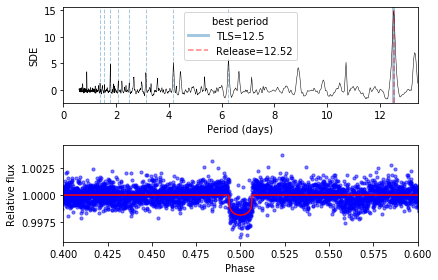

In [22]:
import transitleastsquares as tls

#run tls
time, flux = flat.time, flat.flux
tls_results = tls.transitleastsquares(time, flux).power()

fig = cr.plot_tls(tls_results);
#add period from toi release for reference 
tess_period = t.toi_params['Period (days)'].values[0]
fig.axes[0].axvline(tess_period, 0, 1, c='r', ls='--', alpha=0.5, label=f'Release={tess_period:.2f}')
fig.axes[0].legend(title='best period')
# fig.axes[1].set_ylim(0.98,1.02)
fig.axes[1].set_xlim(0.4,0.6)


  0%|          | 0/2442 periods | 00:00<?

Transit Least Squares TLS 1.0.23 (12 March 2019)
Creating model cache for 28 durations
Searching 18051 data points, 2442 periods from 0.602 to 13.425 days
Using all 8 CPU threads


100%|██████████| 2442/2442 periods | 00:14<00:00


(0.4, 0.6)

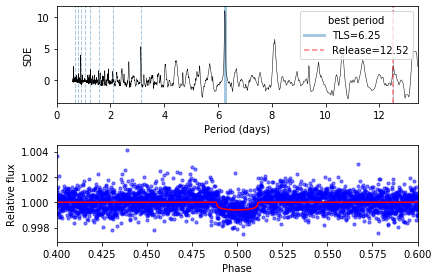

In [23]:
#mask transit
intransit = tls.transit_mask(flat.time, tls_results.period, 2*tls_results.duration, tls_results.T0)
time2 = flat.time[~intransit]
flux2 = flat.flux[~intransit]

#re-run tls
tls_results2 = tls.transitleastsquares(time2, flux2).power()

fig = cr.plot_tls(tls_results2);
#add period from toi release for reference 
tess_period = t.toi_params['Period (days)'].values[0]
fig.axes[0].axvline(tess_period, 0, 1, c='r', ls='--', alpha=0.5, label=f'Release={tess_period:.2f}')
fig.axes[0].legend(title='best period')
# fig.axes[1].set_ylim(0.98,1.02)
fig.axes[1].set_xlim(0.4,0.6)

  0%|          | 0/2442 periods | 00:00<?

Transit Least Squares TLS 1.0.23 (12 March 2019)
Creating model cache for 28 durations
Searching 17242 data points, 2442 periods from 0.602 to 13.425 days
Using all 8 CPU threads


100%|██████████| 2442/2442 periods | 00:11<00:00
  3%|▎         | 361/10513 [00:00<00:02, 3606.00it/s]

Searching for best T0 for period 13.36507 days


100%|██████████| 10513/10513 [00:02<00:00, 4275.39it/s]


(0.4, 0.6)

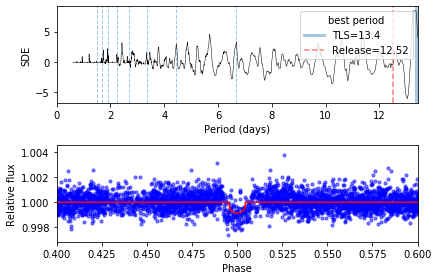

In [42]:
#mask transit
intransit = tls.transit_mask(time2, tls_results2.period, 2*tls_results2.duration, tls_results2.T0)
time3 = time2[~intransit]
flux3 = flux2[~intransit]

#re-run tls
tls_results3 = tls.transitleastsquares(time3, flux3).power()

fig = cr.plot_tls(tls_results3);
#add period from toi release for reference 
tess_period = t.toi_params['Period (days)'].values[0]
fig.axes[0].axvline(tess_period, 0, 1, c='r', ls='--', alpha=0.5, label=f'Release={tess_period:.2f}')
fig.axes[0].legend(title='best period')
# fig.axes[1].set_ylim(0.98,1.02)
fig.axes[1].set_xlim(0.4,0.6)

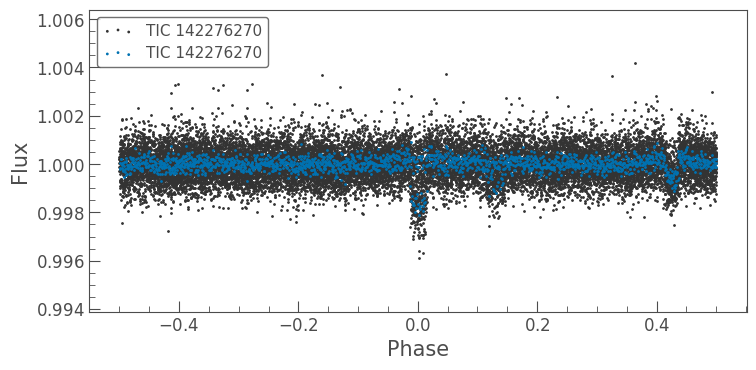

In [29]:
ax = flat.fold(period=6.25, t0=tls_results['T0']).scatter()
flat.bin(10).fold(period=6.25, t0=tls_results['T0']).scatter(ax=ax)

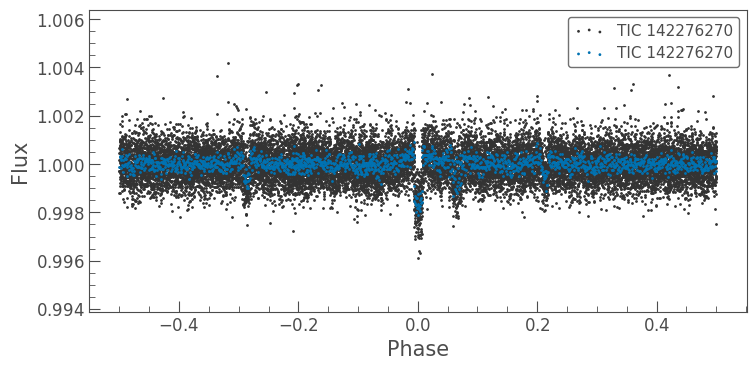

In [28]:
ax = flat.fold(period=6.25*2, t0=tls_results['T0']).scatter()
flat.bin(10).fold(period=6.25*2, t0=tls_results['T0']).scatter(ax=ax)

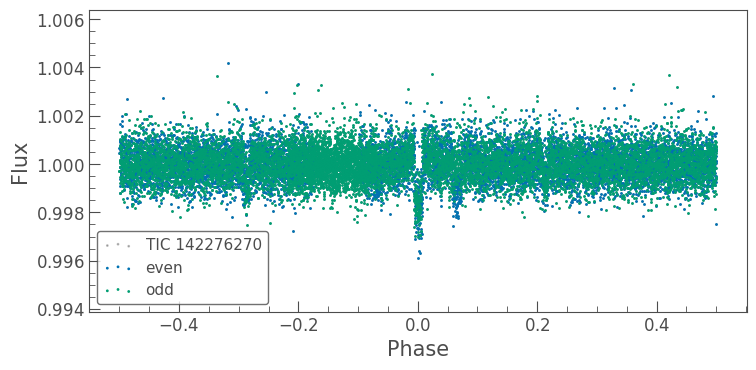

In [31]:
folded = flat.fold(period=6.25*2, t0=tls_results['T0'])
ax = folded.scatter(alpha=0.3)
folded[folded.even_mask].scatter(ax=ax, label='even')
folded[folded.odd_mask].scatter(ax=ax, label='odd')

### custom

### long cadence

Available sectors: [14, 15]
Using sector=14.
Searching targetpixelfile using Tesscut
Applying data quality mask identified in Data Release Notes (sector 14):
aperture photometry mask: threshold



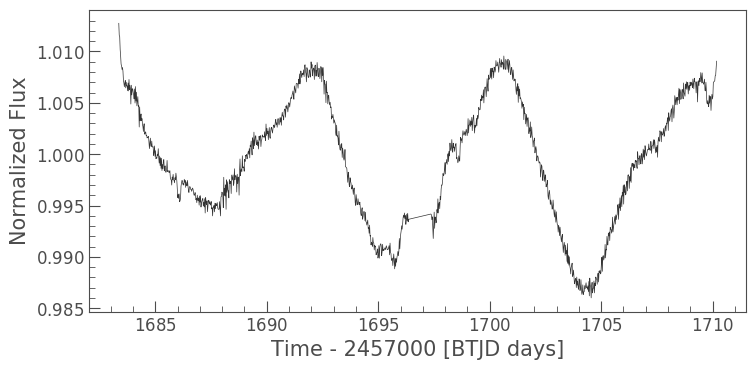

In [10]:
l = cr.LongCadence(toiid=toiid)
lc = l.make_custom_lc(sap_mask='threshold', threshold_sigma=3)
lc.plot()

  0%|          | 0/2438 periods | 00:00<?

Transit Least Squares TLS 1.0.23 (12 March 2019)
Creating model cache for 28 durations
Searching 1237 data points, 2438 periods from 0.602 to 13.406 days
Using all 8 CPU threads


100%|██████████| 2438/2438 periods | 00:05<00:00


(0.4, 0.6)

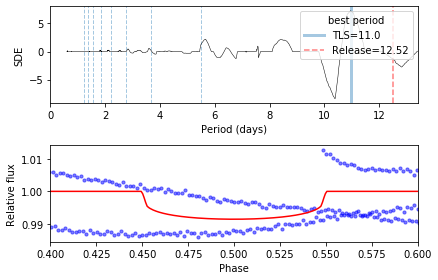

In [11]:
import transitleastsquares as tls

#run tls
time, flux = lc.time, lc.flux
tls_results = tls.transitleastsquares(time, flux).power()

fig = cr.plot_tls(tls_results);
#add period from toi release for reference 
tess_period = t.toi_params['Period (days)'].values[0]
fig.axes[0].axvline(tess_period, 0, 1, c='r', ls='--', alpha=0.5, label=f'Release={tess_period:.2f}')
fig.axes[0].legend(title='best period')
# fig.axes[1].set_ylim(0.998,1.002)
fig.axes[1].set_xlim(0.4,0.6)


  0%|          | 0/2376 periods | 00:00<?

Transit Least Squares TLS 1.0.23 (12 March 2019)
Creating model cache for 28 durations
Searching 998 data points, 2376 periods from 0.601 to 13.114 days
Using all 8 CPU threads


100%|██████████| 2376/2376 periods | 00:04<00:00 


(0.4, 0.6)

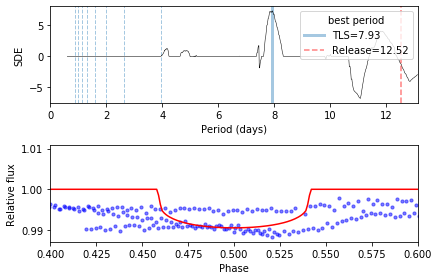

In [12]:
#mask transit
intransit = tls.transit_mask(lc.time, tls_results.period, 2*tls_results.duration, tls_results.T0)
time2 = lc.time[~intransit]
flux2 = lc.flux[~intransit]

#re-run tls
tls_results2 = tls.transitleastsquares(time2, flux2).power()

fig = cr.plot_tls(tls_results2);
#add period from toi release for reference 
tess_period = t.toi_params['Period (days)'].values[0]
fig.axes[0].axvline(tess_period, 0, 1, c='r', ls='--', alpha=0.5, label=f'Release={tess_period:.2f}')
fig.axes[0].legend(title='best period')
# fig.axes[1].set_ylim(0.998,1.002)
fig.axes[1].set_xlim(0.4,0.6)